# 분류
- 학습 데이터로 주어진 데이터의 피처와 레이블값을 ML 알고리즘으로 학습해 모델을 생성하고 생성된 모델에 새로운 데이터 값이 주어졌을 때 레이블 값을 예측하는 것
- 이번 장에서는 분류중에서도 앙상블 위주로 다룰 예정

## 결정 트리
- ML 알고리즘인 동시에 랜덤 포레스트의 기본 구성 요소이기도 함
- 데이터의 규칙을 학습을 통해 자동으로 찾아내서 트리 기반의 분류 규칙을 만드는 알고리즘

### 용어
- 규칙 노드: 규칙 조건
- 리프 노드: 결정된 클래스 값. 자식을 가지지 않는 노드
- 서브 트리: 새로운 규칙 조건마다 생성됨

### 성능
- 깊이가 깊어질수록 과적합으로 이어지기 쉬워 결정트리의 성능 저하 가능성도 높아짐
- 가능한 적은 결정노드로 높은 정확도를 가지기 위해선 분류시 최대한 균일한 데이터 세트를 구성해야 한다.

In [2]:
# graphviz를 사용해 붓꽃 결정 트리를 만들고 시각화하는 코드

import os

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

iris = load_iris()
x = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x, y)

export_graphviz(
    tree_clf,
    out_file="img/iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [3]:
!dot -Tpng img/iris_tree.dot -o img/iris_tree.png

![iris_decision_tree](img/iris_tree.png)

- sample: 얼마나 많은 훈련 샘플이 적용되었는지
- value: 노드에서 각 클래스에 얼마나 많은 훈련 샘플이 있는지
- gini: 정보의 불순도를 측정

### 지니계수
- 엔트로피: 분자의 무질서함을 측정하는 것으로 질서정연할수록 0
- 정보의 균일도를 측정하는 대표적인 방법. 지니계수가 낮을수록 데이터 균일도가 높은 것으로 해석
- 둘 다 사용하긴 하지만 지니계수가 조금 더 계산이 빨라 디폴트로 좋지만, 다른 트리가 만들어질 경우에 지니계수가 빈도 높은 클래스를 한 쪽으로 고립시키는 경향이 있는 것에 비해서 엔트로피가 조금 더 균형잡힌 트리를 만드는 경향이 있다. 
    - [관련링크 - 결정-트리와-불순도에-대한-궁금증](https://tensorflow.blog/2018/03/25/%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%AC%EC%99%80-%EB%B6%88%EC%88%9C%EB%8F%84%EC%97%90-%EB%8C%80%ED%95%9C-%EA%B6%81%EA%B8%88%EC%A6%9D/)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="img/tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

In [8]:
!dot -Tpng img/tree.dot -o img/tree.png

![tree](img/tree.png)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

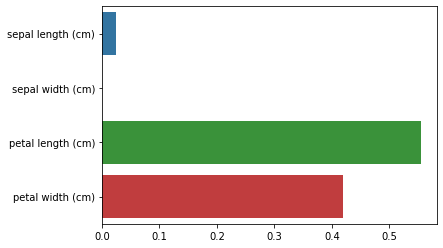

In [12]:
# 피처별로 중요도 값을 매핑하고 막대그래프로 표현
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

### 과적합
- 결정트리는 훈련 데이터에 대한 제약사항이 거의 없는데, 제한을 두지 않으면 트리가 훈련 데이터에 가깝게 맞추려 해서 보통 과적합하게 되기 쉬움
- 이런 경우를 방지하기 위해서 매개변수를 사용. min_samples_split, max_features 등의 파라미터가 있고, 이외에 사이킷런에선 max_depth를 사용해서 결정트리의 최대 깊이를 제어하기도 한다

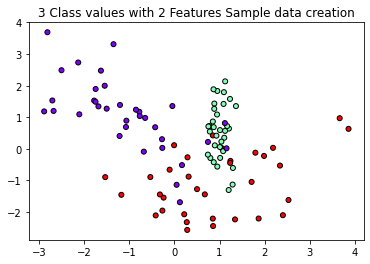

In [13]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [14]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

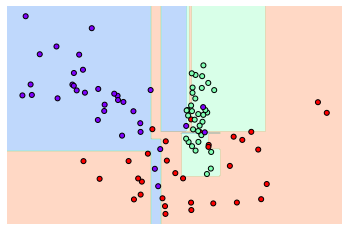

In [15]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

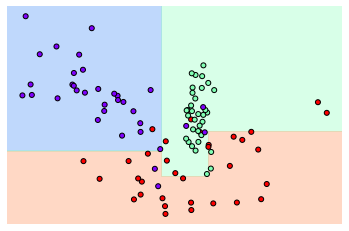

In [16]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

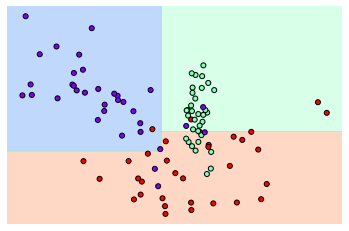

In [17]:
# max_depth = 2 인 트리의 시각화
visualize_boundary(tree_clf, X_features, y_labels)

### 결정트리의 장단점
- 장점
    - 사용하기 편하고 배우기 쉽다.
    - 성능도 뛰어난 편.
- 단점
    - 과적합되기 쉽다.
    - 훈련 데이터에 있는 작은 변화에도 매우 민감한 편이다.

## 앙상블 학습
- 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
*결정트리의 앙상블을 랜덤 포레스트라고 한다.
- 앙상블 학습은 예측기가 가능한 한 서로 독립적일 때 최고의 성능을 발휘한다. 이렇 하기 위한 방법 중 하나로 각기 다른 알고리즘으로 학습시키는 방법이 있는데 이렇게 하면 다른 종류의 오차를 만들 가능성이 높아 앙상블 모델의 정확도를 향상시킨다
- 전통적으로 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)의 세가지로 나뉘며 이 외에 스태킹등의 다양한 방법들이 존재한다.
![보팅과배깅](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbCmIoE%2Fbtqy0RW3DBW%2Fcu6uK7BXlJ5KBUZSmz7R0K%2Fimg.png)


- 부스팅: 여러 개의 분류기가 순차적으로 학습을 수행하되 앞에서 학습한 분류기가 예측을 틀리게 한 데이터에 대해선 올바르게 예측할 수 있도록 다음 분류기에 가중치를 부여하면서 학습과 예측을 진행하는 것.

### 보팅 - 하드 & 소프트 보팅
- 하드 보팅: 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
- 소프트 보팅: 분류기들의 레이블 값 결정 확률을 모두 더한 후 이의 평균을 구한 다음 이들 중 가장 확률이 높은 레이블값을 최종 보팅 결괏값으로 선정. 확률이 높은 투포에 비중을 더 두기 때문에 하드 보팅보다 성능이 높으며 일반적으로 이 방식을 사용.
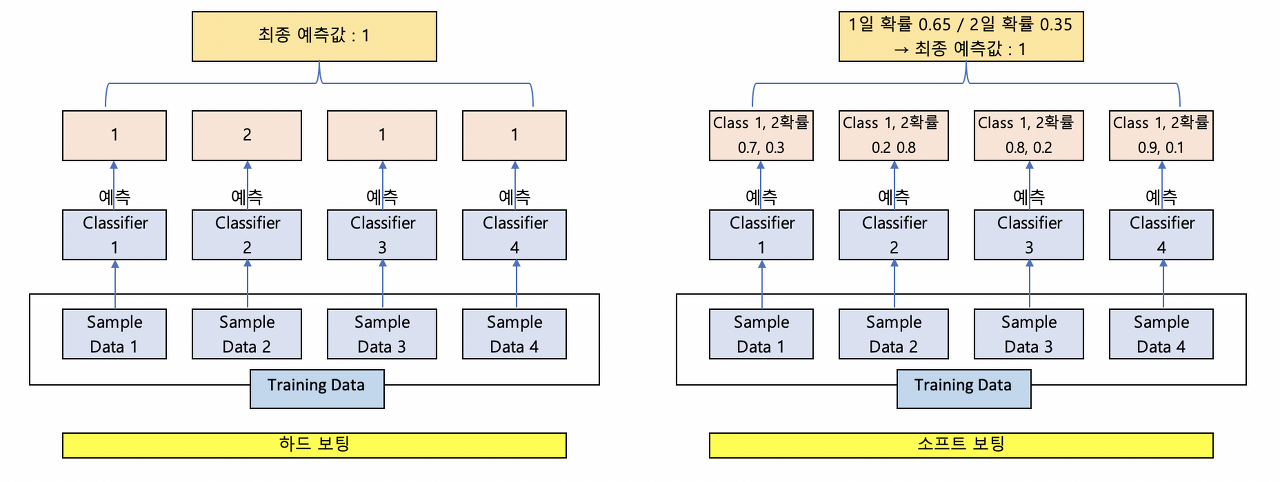

**보팅 방식이 앙상블에 포함된 개별 분류기 중 가장 뛰어난 것보다 정확도가 높을 경우가 많다**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
'''
make_moons 함수는 초승달 모양 클러스터 두 개 형상의 데이터를 생성한다. make_moons 명령으로 만든 데이터는 직선을 사용하여 분류할 수 없다.

인수:
- n_samples : 표본 데이터의 수, 디폴트 100
- noise: 잡음의 크기. 0이면 정확한 반원을 이룸
'''

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
# hard voting
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(solver='liblinear', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma='auto', random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


In [17]:
# soft voting
log_clf = LogisticRegression(solver='liblinear', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma='auto', probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


### 배깅
- 같은 알고리즘을 사용하지만 각각의 분류기에 원본 학습 데이터를 샘플링한 다른 데이터세트를 할당한다.
    - 페이스팅: 배깅과 페이스팅의 차이는 배깅은 훈련 세트에서 중복을 허용하여 샘플링하는 방식이고 페이스팅은 중복을 허용하지 않는다. 페이스팅 사용시엔 클래스 BaggingClassifier에서 인자 bootstrap=False로 지정하면 된다.
- 모든 예측기의 예측 결과를 모아서 새 샘플에 대한 예측을 만드는데 이때 분류에서는 통계적 최빈값을 사용하고, 회귀에 대해선 평균을 계산한다.

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42) # n_jobs: 훈련과 예측에 사용할 CPU 코어수 지정
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.904


### 랜덤 포레스트
- 앙상블 알고리즘 중 비교적 빠른 수행속도를 보이며 다양한 영역에서 높은 예측 성능을 보임
- 여러개의 결정트리 분류기가 전체 데이터에서 배깅 방식으로 샘플링한 데이터를 통해 개별적으로 학습을 수행한 후 최종적으로 모든 분류기가 보팅으로 예측 결정을 하는 방식

![랜덤포레스트](https://blog.kakaocdn.net/dn/sQIL6/btquWNcgPEc/X621EM2dJEQR0whIEA6qY0/img.png)

- 부트스트래핑(Bootstraping): 여러개의 데이터 세트를 중첩되게 샘플링해서 추출하는 방식을 부트스트래핑 분할방식이라고 한다.

In [20]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


### GBM(Gradient Boosting Machine)
- 부스팅: 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치를 부여해서 오류를 개선해나가며 학습하는 방식.
- 그래디언트 부스팅에선 가중치 업데이트에 경사 하강법을 이용한다.
- 분류 및 회귀에 모두 사용 가능

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.8880
GBM 수행 시간: 0.1 초 


In [32]:
'''
잡음이 섞인 2차 곡선 형태의 훈련 세트로 학습
'''

import numpy as np

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [33]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [34]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
print(y_pred)

[0.75026781]


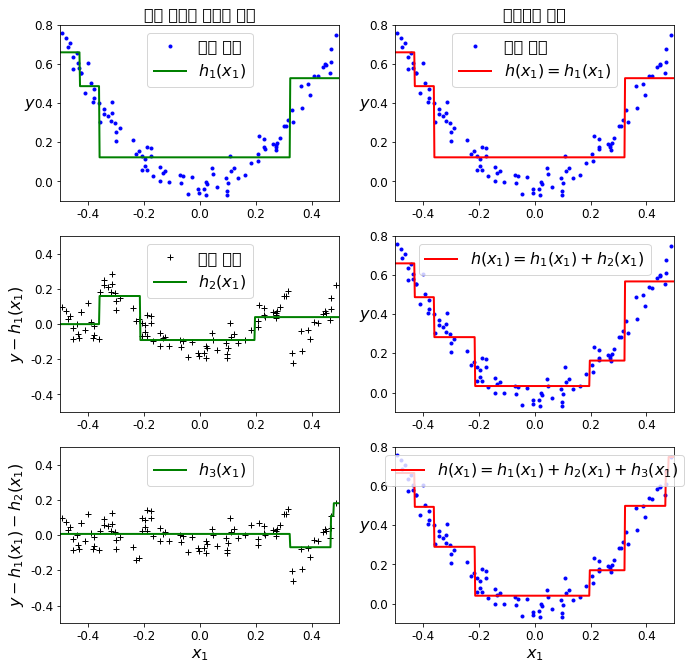

In [44]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12



def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="훈련 세트")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("잔여 오차와 트리의 예측", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="훈련 세트")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("앙상블의 예측", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="잔여 오차")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()